# Accident Risk Prediction using Linear Regression

This notebook demonstrates a complete pipeline for predicting accident risk using linear regression, including data visualization, preprocessing, model training, and submission generation.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

## 1. Data Loading

In [2]:
# Load the datasets
train_df = pd.read_csv('ml_model/train.csv')
test_df = pd.read_csv('ml_model/test.csv')

print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)
print("\nTrain columns:", list(train_df.columns))
print("Test columns:", list(test_df.columns))

Train dataset shape: (517754, 14)
Test dataset shape: (172585, 13)

Train columns: ['id', 'road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting', 'weather', 'road_signs_present', 'public_road', 'time_of_day', 'holiday', 'school_season', 'num_reported_accidents', 'accident_risk']
Test columns: ['id', 'road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting', 'weather', 'road_signs_present', 'public_road', 'time_of_day', 'holiday', 'school_season', 'num_reported_accidents']


In [3]:
# Display first few rows
print("Train data head:")
display(train_df.head())

print("\nTest data head:")
display(test_df.head())

Train data head:


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56



Test data head:


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


## 2. Data Exploration and Visualization

In [4]:
# Basic statistics
print("Train data statistics:")
display(train_df.describe())

print("\nData types:")
display(train_df.dtypes)

Train data statistics:


,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849975,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000



Data types:


id                          int64
road_type                  object
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                   object
weather                    object
road_signs_present           bool
public_road                  bool
time_of_day                object
holiday                      bool
school_season                bool
num_reported_accidents      int64
accident_risk             float64
dtype: object

In [5]:
# Check for missing values
print("Missing values in train data:")
print(train_df.isnull().sum())

print("\nMissing values in test data:")
print(test_df.isnull().sum())

Missing values in train data:
id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

Missing values in test data:
id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
dtype: int64


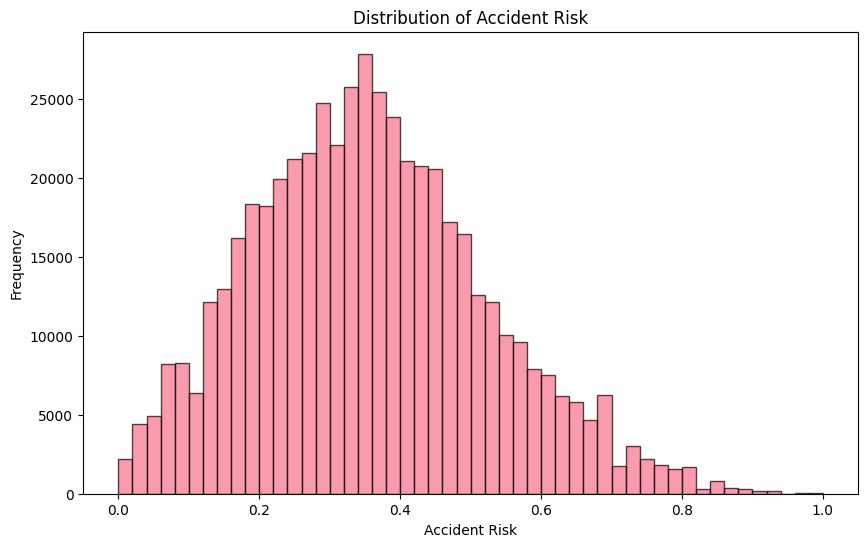

In [6]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
plt.hist(train_df['accident_risk'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Accident Risk')
plt.xlabel('Accident Risk')
plt.ylabel('Frequency')
plt.show()

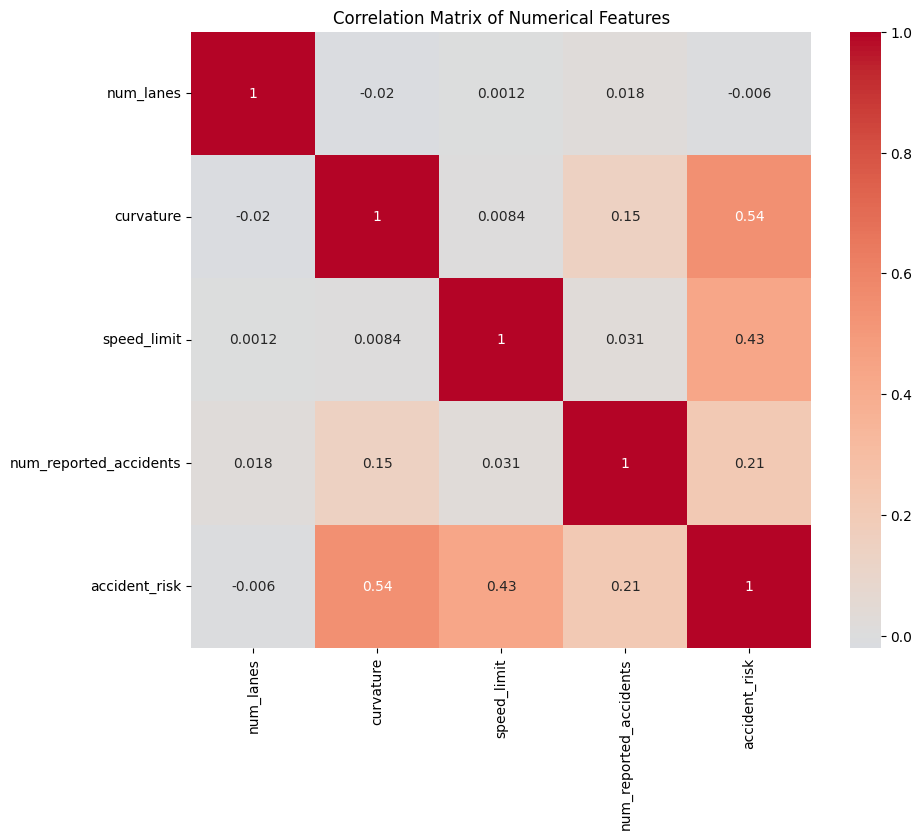

In [7]:
# Correlation heatmap for numerical features
numerical_cols = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents', 'accident_risk']
corr_matrix = train_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

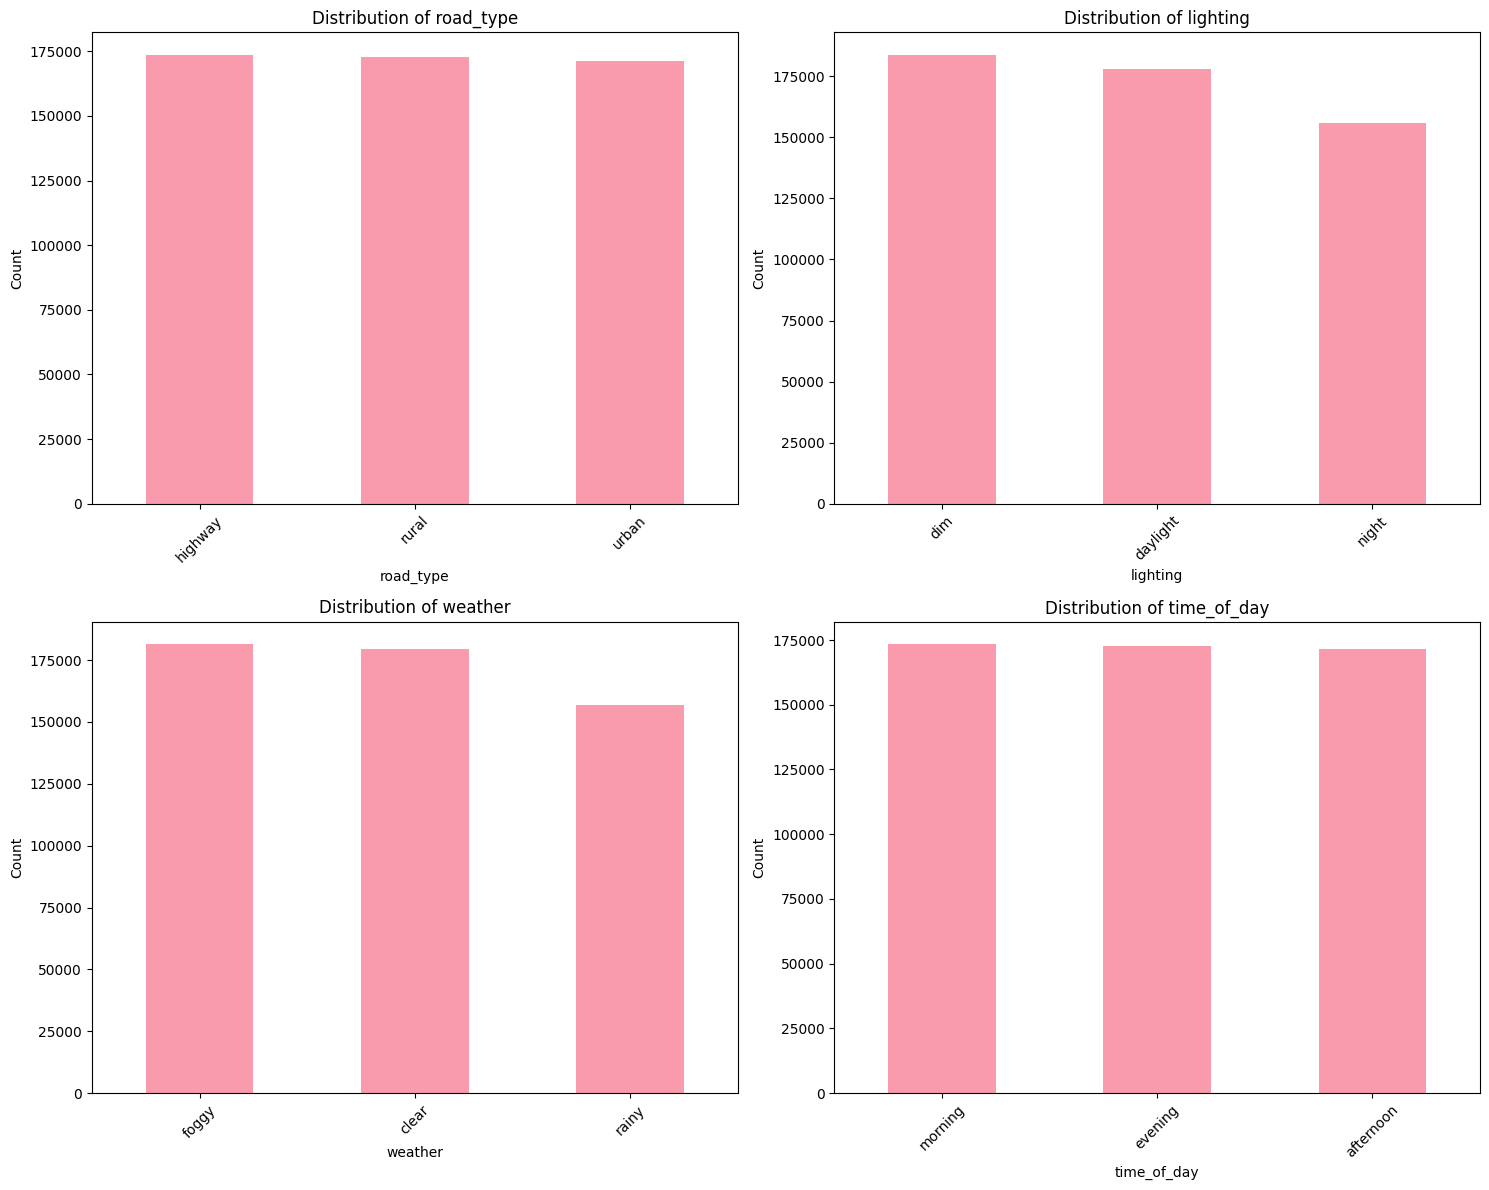

In [8]:
# Categorical feature distributions
categorical_cols = ['road_type', 'lighting', 'weather', 'time_of_day']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    train_df[col].value_counts().plot(kind='bar', ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

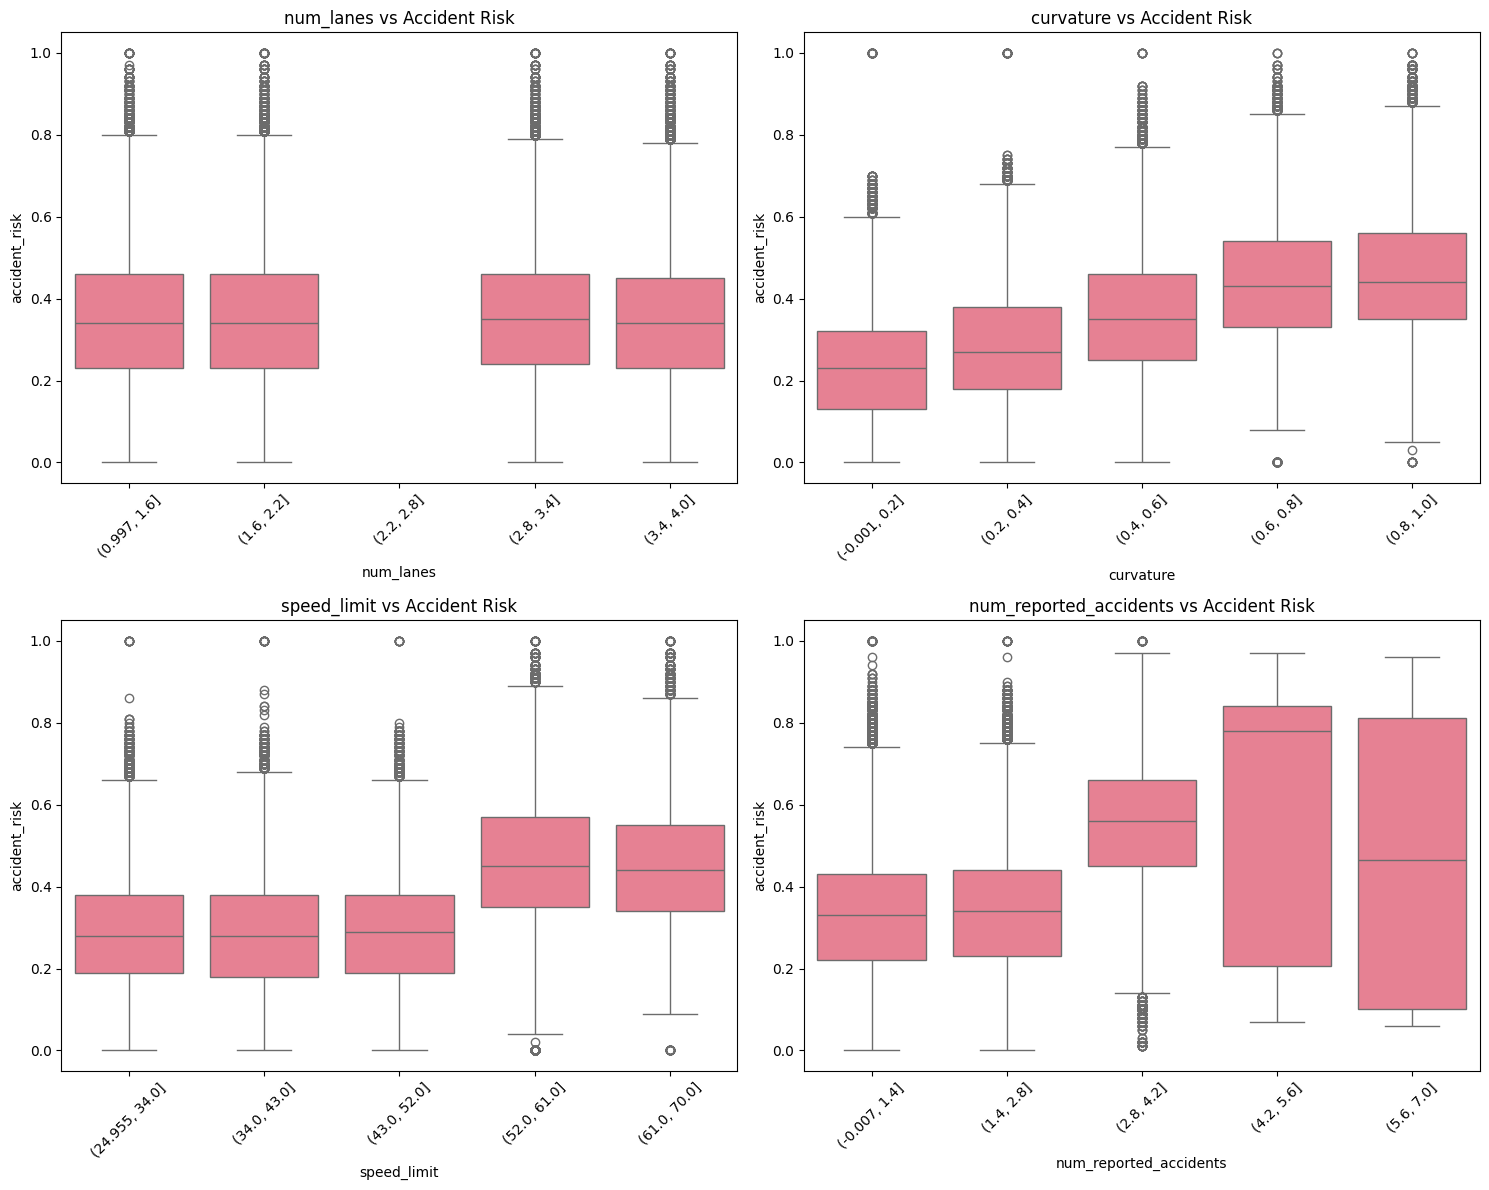

In [9]:
# Box plots for numerical features vs target
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

numerical_features = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=pd.cut(train_df[feature], bins=5), y=train_df['accident_risk'], ax=axes[i])
    axes[i].set_title(f'{feature} vs Accident Risk')
    axes[i].set_xlabel(feature)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [10]:
# Separate features and target
X = train_df.drop(['id', 'accident_risk'], axis=1)
y = train_df['accident_risk']
X_test = test_df.drop(['id'], axis=1)

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Test features shape:", X_test.shape)

Features shape: (517754, 12)
Target shape: (517754,)
Test features shape: (172585, 12)


In [11]:
# Identify categorical and numerical columns
categorical_cols = ['road_type', 'lighting', 'weather', 'time_of_day']
numerical_cols = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']
boolean_cols = ['road_signs_present', 'public_road', 'holiday', 'school_season']

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)
print("Boolean columns:", boolean_cols)

Categorical columns: ['road_type', 'lighting', 'weather', 'time_of_day']
Numerical columns: ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']
Boolean columns: ['road_signs_present', 'public_road', 'holiday', 'school_season']


In [12]:
# Encode categorical variables
label_encoders = {}
X_encoded = X.copy()
X_test_encoded = X_test.copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    X_test_encoded[col] = le.transform(X_test[col])
    label_encoders[col] = le

print("Categorical variables encoded successfully")
print("Encoded train shape:", X_encoded.shape)
print("Encoded test shape:", X_test_encoded.shape)

Categorical variables encoded successfully
Encoded train shape: (517754, 12)
Encoded test shape: (172585, 12)


In [13]:
# Convert boolean columns to int
for col in boolean_cols:
    X_encoded[col] = X_encoded[col].astype(int)
    X_test_encoded[col] = X_test_encoded[col].astype(int)

print("Boolean columns converted to integers")

Boolean columns converted to integers


In [14]:
# Scale numerical features
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])
X_test_encoded[numerical_cols] = scaler.transform(X_test_encoded[numerical_cols])

print("Numerical features scaled successfully")
print("Final train features shape:", X_encoded.shape)
print("Final test features shape:", X_test_encoded.shape)

Numerical features scaled successfully
Final train features shape: (517754, 12)
Final test features shape: (172585, 12)


In [15]:
# Display processed data
print("Processed train data head:")
display(X_encoded.head())

print("\nProcessed test data head:")
display(X_test_encoded.head())

Processed train data head:


,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,2,-0.438680,-1.572918,-0.703840,0,2,0,1,0,0,1,-0.209797
1,2,1.346344,1.839137,-0.703840,0,0,1,0,1,1,1,-1.325918
2,1,1.346344,0.518342,1.512963,1,0,0,1,2,1,0,0.906324
3,0,1.346344,-1.536229,-0.703840,1,2,1,1,2,0,0,-0.209797
4,1,-1.331192,0.334898,0.879591,0,1,0,0,1,1,0,-0.209797



Processed test data head:


,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,0,-0.438680,-0.545632,-0.070467,2,0,1,1,0,1,1,-0.209797
1,2,0.453832,-1.646295,-0.070467,1,1,1,0,0,1,0,-1.325918
2,2,-0.438680,0.371587,-0.703840,1,0,1,0,0,1,1,-0.209797
3,1,1.346344,1.692382,-0.703840,0,2,0,0,0,0,0,0.906324
4,0,-0.438680,1.362183,-0.703840,0,0,1,0,1,0,1,2.022445


## 4. Model Training

In [16]:
# Split the data for validation
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (414203, 12)
Validation set shape: (103551, 12)


In [17]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully")
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model trained successfully
Model coefficients: [ 5.09879217e-04  6.12027054e-04  8.96425840e-02  7.87709719e-02
  9.05558453e-02  4.49047587e-02 -1.62352984e-03 -6.75784400e-04
 -5.55933136e-04  9.53690290e-05 -8.26443547e-05  1.56034201e-02]
Model intercept: 0.22403272993542417


In [18]:
# Make predictions on validation set
y_pred_val = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0078
R² Score: 0.7167


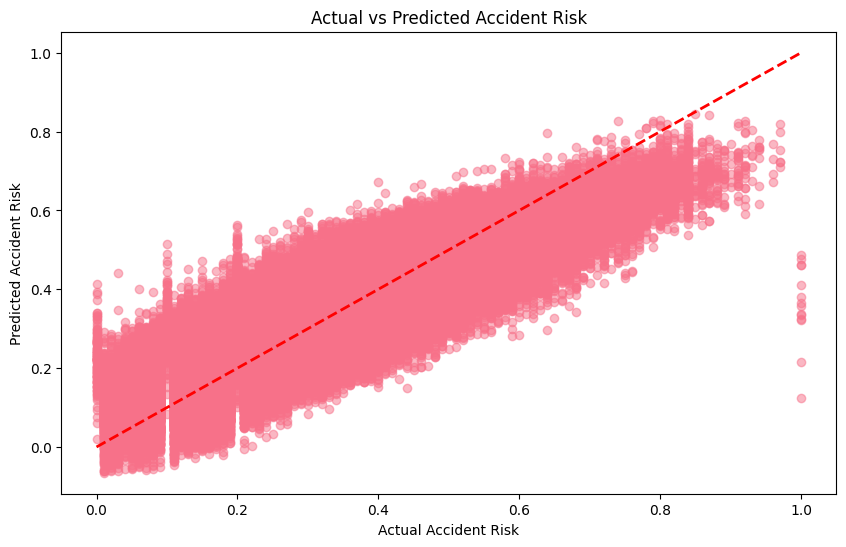

In [19]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_val, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Accident Risk')
plt.ylabel('Predicted Accident Risk')
plt.title('Actual vs Predicted Accident Risk')
plt.show()

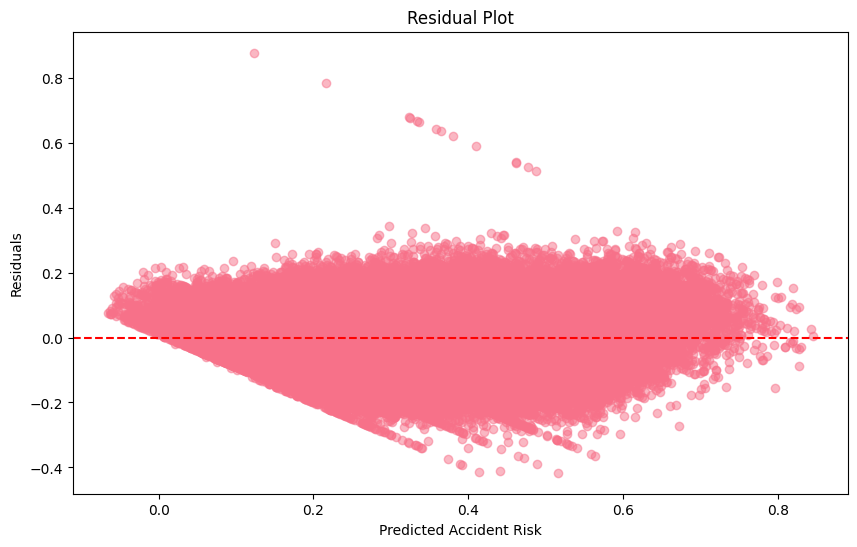

In [20]:
# Plot residuals
residuals = y_val - y_pred_val
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_val, residuals, alpha=0.5)
plt.xlabel('Predicted Accident Risk')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## 5. Save Model with Joblib

In [21]:
# Save the model
joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved as 'linear_regression_model.pkl'")

# Save the scaler and encoders for future use
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
print("Scaler and label encoders saved")

Model saved as 'linear_regression_model.pkl'
Scaler and label encoders saved


## 6. Make Predictions and Create Submission

In [22]:
# Make predictions on test data
test_predictions = model.predict(X_test_encoded)

print("Test predictions shape:", test_predictions.shape)
print("Test predictions summary:")
print(f"Min: {test_predictions.min():.4f}")
print(f"Max: {test_predictions.max():.4f}")
print(f"Mean: {test_predictions.mean():.4f}")
print(f"Std: {test_predictions.std():.4f}")

Test predictions shape: (172585,)
Test predictions summary:
Min: -0.0632
Max: 0.8433
Mean: 0.3519
Std: 0.1412


In [23]:
# Create submission dataframe
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'accident_risk': test_predictions
})

print("Submission dataframe shape:", submission_df.shape)
display(submission_df.head())

Submission dataframe shape: (172585, 2)


,id,accident_risk
0,517754,0.344853
1,517755,0.185445
2,517756,0.288323
3,517757,0.425585
4,517758,0.319727


In [24]:
# Save submission file
submission_df.to_csv('ml_model/submission.csv', index=False)
print("Submission saved as 'ml_model/submission.csv'")

Submission saved as 'ml_model/submission.csv'


## 7. Model Interpretation

In [25]:
# Feature importance (coefficients)
feature_names = X_encoded.columns
coefficients = model.coef_

# Create a dataframe for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute_Coefficient': np.abs(coefficients)
})

# Sort by absolute coefficient
feature_importance = feature_importance.sort_values('Absolute_Coefficient', ascending=False)

print("Feature Importance:")
display(feature_importance)

Feature Importance:


,Feature,Coefficient,Absolute_Coefficient
4,lighting,0.090556,0.090556
2,curvature,0.089643,0.089643
3,speed_limit,0.078771,0.078771
5,weather,0.044905,0.044905
11,num_reported_accidents,0.015603,0.015603
6,road_signs_present,-0.001624,0.001624
7,public_road,-0.000676,0.000676
1,num_lanes,0.000612,0.000612
8,time_of_day,-0.000556,0.000556
0,road_type,0.000510,0.000510


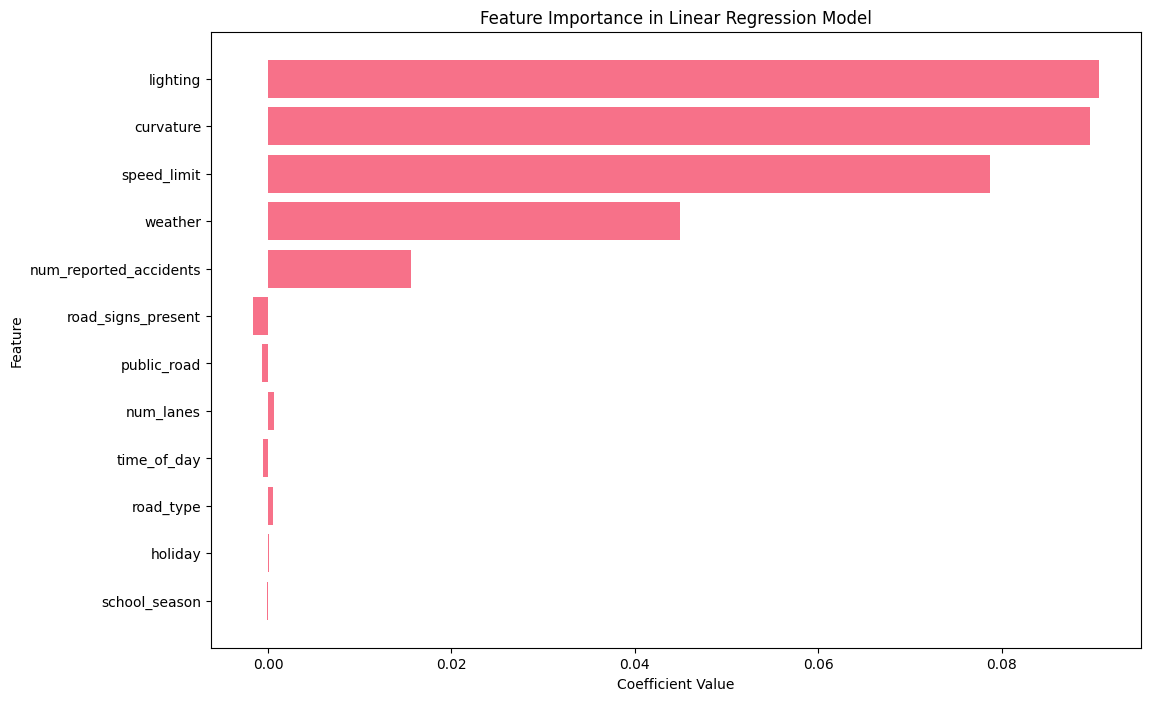

In [26]:
# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression Model')
plt.gca().invert_yaxis()
plt.show()

## Summary

This notebook has successfully:
1. Loaded and explored the accident risk dataset
2. Performed comprehensive data visualization
3. Preprocessed the data (encoding categorical variables, scaling numerical features)
4. Trained a Linear Regression model
5. Evaluated model performance
6. Saved the trained model using joblib
7. Generated predictions for the test set
8. Created a submission file
9. Interpreted the model coefficients

The model is now ready for deployment and the submission file can be uploaded to the competition platform.